## Get the Data

Either use the provided .csv file or (optionally) get fresh (the freshest?) data from running an SQL query on StackExchange: 

Follow this link to run the query from [StackExchange](https://data.stackexchange.com/stackoverflow/query/675441/popular-programming-languages-per-over-time-eversql-com) to get your own .csv file

<code>
select dateadd(month, datediff(month, 0, q.CreationDate), 0) m, TagName, count(*)
from PostTags pt
join Posts q on q.Id=pt.PostId
join Tags t on t.Id=pt.TagId
where TagName in ('java','c','c++','python','c#','javascript','assembly','php','perl','ruby','visual basic','swift','r','object-c','scratch','go','swift','delphi')
and q.CreationDate < dateadd(month, datediff(month, 0, getdate()), 0)
group by dateadd(month, datediff(month, 0, q.CreationDate), 0), TagName
order by dateadd(month, datediff(month, 0, q.CreationDate), 0)
</code>

## Import Statements

In [45]:
import pandas as pd
import matplotlib.pyplot as plt


## Data Exploration

**Challenge**: Read the .csv file and store it in a Pandas dataframe

In [4]:
df = pd.read_csv("QueryResults.csv",names=['Date','TAG','POST'], header=0)

**Challenge**: Examine the first 5 rows and the last 5 rows of the of the dataframe

In [5]:
df.head()

,Date,TAG,POST
0,2008-07-01 00:00:00,c#,3
1,2008-08-01 00:00:00,assembly,8
2,2008-08-01 00:00:00,c,83
3,2008-08-01 00:00:00,c#,506
4,2008-08-01 00:00:00,c++,164


In [6]:
df.tail()

,Date,TAG,POST
2323,2022-07-01 00:00:00,php,4463
2324,2022-07-01 00:00:00,python,24690
2325,2022-07-01 00:00:00,r,4418
2326,2022-07-01 00:00:00,ruby,479
2327,2022-07-01 00:00:00,swift,1918


**Challenge:** Check how many rows and how many columns there are. 
What are the dimensions of the dataframe?

In [7]:
df.shape

(2328, 3)

In [8]:
df.columns

Index(['Date', 'TAG', 'POST'], dtype='object')

**Challenge**: Count the number of entries in each column of the dataframe

In [9]:
df.count()

Date    2328
TAG     2328
POST    2328
dtype: int64

**Challenge**: Calculate the total number of post per language.
Which Programming language has had the highest total number of posts of all time?

In [23]:
df.groupby('TAG').sum().idxmax()


POST    javascript
dtype: object

Some languages are older (e.g., C) and other languages are newer (e.g., Swift). The dataset starts in September 2008.

**Challenge**: How many months of data exist per language? Which language had the fewest months with an entry? 


In [24]:
df.groupby('TAG').count()

,Date,POST
TAG,,
assembly,168,168
c,168,168
c#,169,169
c++,168,168
delphi,168,168
go,153,153
java,168,168
javascript,168,168
perl,168,168


## Data Cleaning

Let's fix the date format to make it more readable. We need to use Pandas to change format from a string of "2008-07-01 00:00:00" to a datetime object with the format of "2008-07-01"

In [27]:
type(df['Date'][1])

str

In [31]:
df.Date[1]

Timestamp('2008-08-01 00:00:00')

In [32]:
df.Date = pd.to_datetime(df.Date)
df.head()

,Date,TAG,POST
0,2008-07-01,c#,3
1,2008-08-01,assembly,8
2,2008-08-01,c,83
3,2008-08-01,c#,506
4,2008-08-01,c++,164


## Data Manipulation



The easiest way to accomplish this is by using the .pivot() method in Pandas. Try the example for yourself. The thing to understand is how to supply the correct aguments to get the desired outcome. The index are the categories for the rows. The columns are the categories for the columns. And the values are what you want in the new cells. 

In [33]:
pivoted_df = df.pivot(index='Date',columns='TAG',values='POST')

**Challenge**: What are the dimensions of our new dataframe? How many rows and columns does it have? Print out the column names and print out the first 5 rows of the dataframe.

In [34]:
pivoted_df.shape

(169, 14)

In [35]:
pivoted_df.columns

Index(['assembly', 'c', 'c#', 'c++', 'delphi', 'go', 'java', 'javascript',
       'perl', 'php', 'python', 'r', 'ruby', 'swift'],
      dtype='object', name='TAG')

In [36]:
pivoted_df.head()

TAG,assembly,c,c#,c++,delphi,go,java,javascript,perl,php,python,r,ruby,swift
Date,,,,,,,,,,,,,,
2008-07-01,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2008-08-01,8.0,83.0,506.0,164.0,14.0,NaN,222.0,164.0,28.0,159.0,120.0,NaN,70.0,NaN
2008-09-01,28.0,318.0,1647.0,753.0,104.0,NaN,1133.0,637.0,130.0,477.0,537.0,6.0,287.0,NaN
2008-10-01,15.0,303.0,1989.0,809.0,112.0,NaN,1150.0,724.0,127.0,612.0,508.0,NaN,247.0,NaN
2008-11-01,17.0,259.0,1732.0,734.0,141.0,NaN,957.0,581.0,97.0,501.0,452.0,1.0,159.0,NaN


**Challenge**: Count the number of entries per programming language. Why might the number of entries be different? 

In [37]:
pivoted_df.count()

TAG
assembly      168
c             168
c#            169
c++           168
delphi        168
go            153
java          168
javascript    168
perl          168
php           168
python        168
r             166
ruby          168
swift         160
dtype: int64

In [38]:
pivoted_df.fillna(0,inplace=True)

In [40]:
pivoted_df.isna().values.any()

False

## Data Visualisaton with with Matplotlib


**Challenge**: Use the [matplotlib documentation](https://matplotlib.org/3.2.1/api/_as_gen/matplotlib.pyplot.plot.html#matplotlib.pyplot.plot) to plot a single programming language (e.g., java) on a chart.

AttributeError: ignored

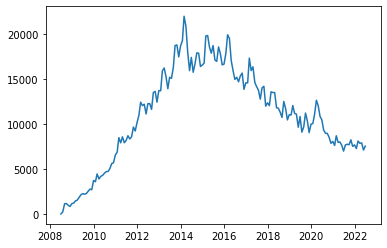

In [50]:
plt.plot(pivoted_df.index,pivoted_df['java'])


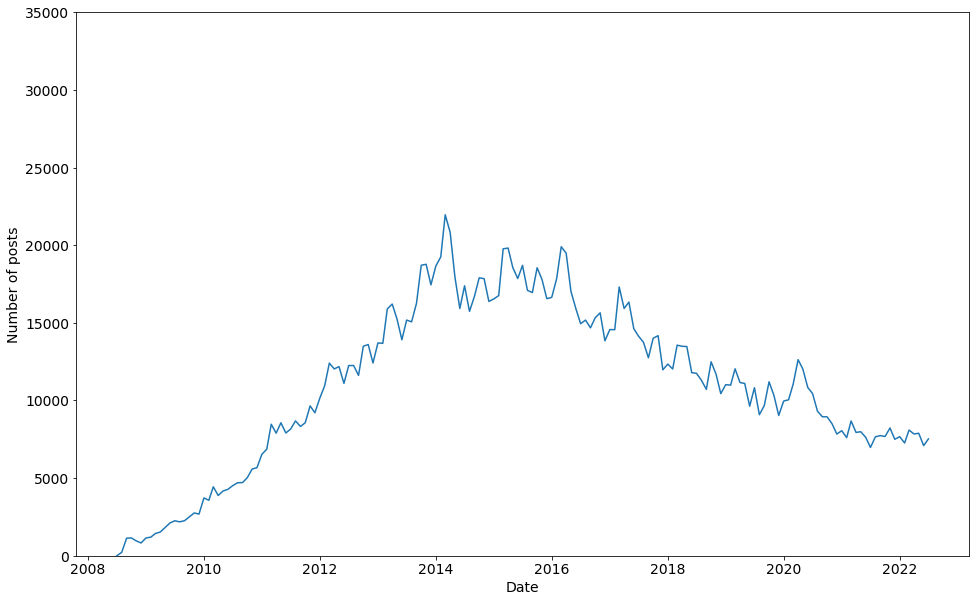

In [56]:
plt.figure(figsize=(16,10))
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel('Date',fontsize=14)
plt.ylabel('Number of posts', fontsize=14)
plt.ylim(0,35000)
plt.plot(pivoted_df.index,pivoted_df.java)

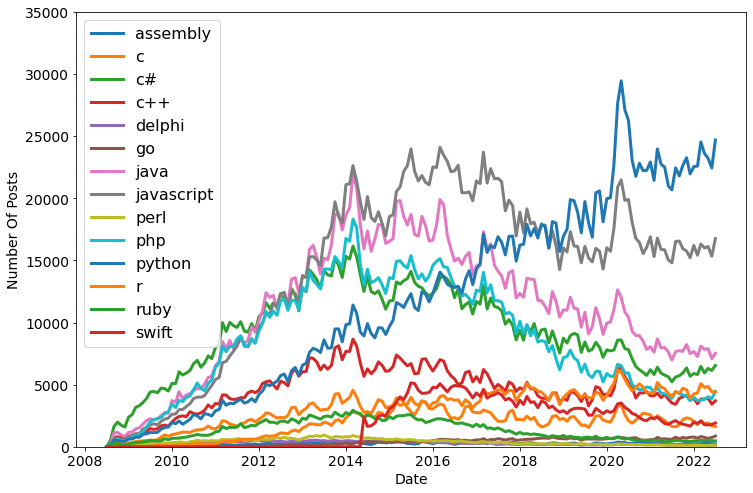

In [73]:
plt.figure(figsize=(12,8))
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel('Date',fontsize=14)
plt.ylabel('Number Of Posts', fontsize=14)
plt.ylim(0,35000)
for column in pivoted_df.columns:
  plt.plot(pivoted_df.index, pivoted_df[column],linewidth=3,label=pivoted_df[column].name)

plt.legend(fontsize=16)

**Challenge**: Show two line (e.g. for Java and Python) on the same chart.

# Smoothing out Time Series Data

Time series data can be quite noisy, with a lot of up and down spikes. To better see a trend we can plot an average of, say 6 or 12 observations. This is called the rolling mean. We calculate the average in a window of time and move it forward by one overservation. Pandas has two handy methods already built in to work this out: [rolling()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.rolling.html) and [mean()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.core.window.rolling.Rolling.mean.html). 

In [80]:
# The window is number of observations that are averaged
roll_df = pivoted_df.rolling(window=10).mean()

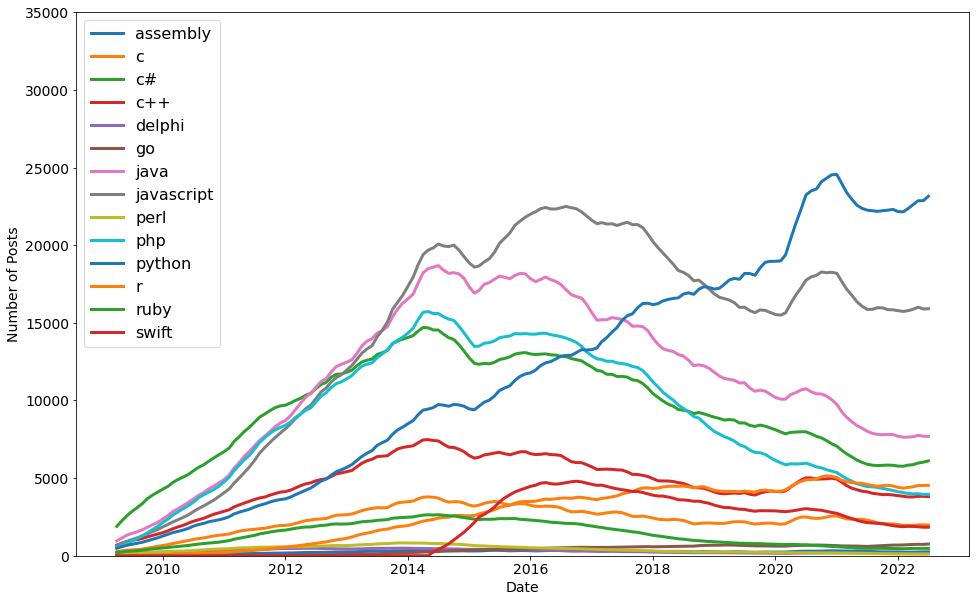

In [81]:
plt.figure(figsize=(16,10))
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Number of Posts', fontsize=14)
plt.ylim(0, 35000)
for column in roll_df.columns:
  plt.plot(roll_df.index,roll_df[column],linewidth=3,label=roll_df[column].name)

plt.legend(fontsize=16)
